# Week 2: Lattice Statistical Theories and the Ising Model Report


## 1. Questions to Aid in Developing Intuition

#### 1.1 Perturbation to High T Ising
Given an infinite 2D Ising model at an infinite temperature, if I apply a small magnetic field throughout the whole sample in the positive spin direction, what will the expectation of the magnetic moment be?

__Answer:__

At inifinite temperature, the excitation of the spins will still overcome the alignment induced by the small magnetic field. This can be viewed in the probabilities $P(\{\sigma_i\}) = e^{-\beta H(\{\sigma_i\})}\xrightarrow{\beta \to 0}1 $, which shows that all configurations are equally as likely regardless of the magnetic field in the Hamiltonian $H$.

#### 1.2 Symmetries of Various Models
We discussed that the Ising model Hamiltonian has a $Z_2$ global symmetry, what are the symmetries of the following Hamiltonians? (you need not exhaust the list but try to provide as many as you can): ($<ij>$ means $i,j$ are nearest neighbours)<br>
(a)<br> A 1D lattice with the degree of freedom $\sigma_i\in\{1,0,-1\}$ living on each site. The energy function (Hamiltonain) given by $$H=-J\sum_{<ij>}\sigma_i\sigma_j+h\sum_{i}\sigma_i$$
(b)<br> A 2D lattice with the degree of freedom $\vec{x}_i\in {S^1}$ a 2D unit vector living on each site. The energy function (Hamiltonian) given by
$$H=-J\sum_{<ij>}\vec{x}_i\cdot\vec{x}_j$$
(c)<br> A 1D lattice with the degree of freedom $\sigma_i\in\{1,0,-1\}$ living on each site. The energy function (Hamiltonain) given by $$H=-J\sum_{i}\sigma_{2i}\sigma_{2i+2}-L\sum_{i}\sigma_{2i+1}\sigma_{2i+3}$$

__Answer:__

(a)<br> Considering an infinite latice with $i \in \mathbf{Z}$:
- We have the translation symmetry of the 1D lattice ($\sigma_i \to \sigma_{i+k}$, $k\in\mathbf{Z}$)
- We also have reflection symmetry of the lattice ($\sigma_i \to \sigma_{-i}$)
- While the linear term breaks the $\mathbf{Z}_2$ symmetry, we do mantain $\sigma_i \to -\sigma_i$ with $h\to -h$ ($h$ being the coupling constant to the linear term in the Hamiltonian)

(b)<br> 
- Assuming a square lattice, we have a $D_8$ symmetry: the rotations multiples of $90^\circ$ which make the $\mathbf{Z}_4$ group, together with a $\mathbf{Z}_2$ reflection symmetry.
- We have a reflection symmetry of $\vec{x}_i \to -\vec{x}_i$ since each term is quadratic in the lattice terms.
- We further have rotation symmetry $\vec{x}_i\to R\vec{x}_i,\; |R|=1$ since we have a dot product of elements (this, together with reflection, makes $O(2)$ symmetry).

(c)<br> 
- We have translations for an even number of lattice sites (odd number would require exchange of the coupling constants $J \leftrightarrow L$) 
- We still have reflection symmetry of the lattice $\vec{x}_i \to \vec{x}_{-i}$
- We have reflection symmetry of the spins $\sigma_{i}\to - \sigma_{i}$. In fact, we have sepparate symmetries, one for only the even lattice points $\sigma_{2i}\to-\sigma_{2i}$, and another one for odd lattice points $\sigma_{2i+1}\to-\sigma_{2i+1}$

#### 1.3 Size of State Space
How many basis states are there in a Order 4 Potts model on a $X\times Y\times Z$ ($X,Y,Z$ Integers) Lattice?

__Answer:__

If we have $\sigma_i \in A =\{1, \ldots, m\}$ (clearly $|A|=m$), and we have $X\cdot Y\cdot Z$ lattice points in total, then the total amounts of configurations is $m^{X\cdot Y\cdot Z}$.

#### 1.4  The 3 Point Correlator
Recall that an example of an experiment that can detect the two point correlator $<\sigma_i\sigma_j>$ is forcing spin $i$ to be positive (perhaps through a magnetic field) and asking how this constraint affects spin $j$. Can you come up with an experiment which would detect a 3 point correlator $<\sigma_i\sigma_j\sigma_k>$? What about higher order correlators?

__Answer:__

We can attempt to force two fixed lattice points to $\sigma_i$ and $\sigma_j$, and then we can probe $\sigma_k$ on the other lattice points to test the 3 point correlators. Similarly for higher correlators. However, we also know that correlator functions are related to the central moments of $\sigma_i$, and thus an experiment could also attempt to measure these quantities (variance for the two point correlator, skewness for the 3 point correlator and so forth).

#### 1.5 (Bonus **Not Covered In Lecture*)  What happens at criticality?
We discussed in detail the behaviour of our models above and below the critical parameter (generally temperature). But this leaves out the highly intriguing quesiton of what is the behaviour of the system *exactly* at criticality? I.e $T=T_c$. How do you expect $<\sigma_i>,<\sigma_i\sigma_j>,...$ and so on to behave?<br>
$\textbf{Note}$: We have not provided you with the tools to answer this so we expect the answers to be based purely off of guesses and physical intuition

__Answer:__

We expect observable quantities (such as the n point correlation functions) to behave discontinuously at criticality (basing off on the phase-transition behaviour we observe). In fact, we expect these quantities to grow or decay propotionally to $|T-T_c|^{-\lambda}$, which precisely has singularities in criticality when $\lambda >0$ (and also has singularities on the derivatives if $\lambda <0$)

## 2. Numerical Exercises

#### 2.1 The Need for Monte Carlo (2D Ising)
In this problem we will try to simulate the Ising model naively (for small system sizes) and demonstrate the need for a more efficient and effective method of doing so:<br>
(a) Start by creating an array with all possible states for an $N\times N$ Ising model (PBC) and an energy function on the states. <br>
(b) Define the parition function as a Python function which accepts the temperature and evaluates it directly by summing over all states.<br>
(c) Define a function to calculate the mean magnetization from the partition function using the formalism developed last week, at various points above and below the analytically deduced transition temperature.<br>
$\textbf{Note:}$ Do not expect this to look very nice for the small lattice sizes we will consider.
<br>
(d) Plot the mean magnetization for lattice sizes $2\times 2,3\times 3,4\times 4$ ($5\times 5$ if you are feeling bold) and record the time for the computation in each case. Appropriately fit the computation time to the lattice size and estimate the time it would take for lattices of size $10\times 10$ and finally $N_0\times N_0$ ($N_0$ is Avagadro's number) and conclude that this approach would be disasterous to continue.

In [1]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from time import time

def create_lattice(N: int)-> np.ndarray:
    """
    Creates an array with all possible NxN lattice configurations.
    The array is of shape (2^(N^2), N, N) and contains all possible configurations
    """
    lattice = np.array(list(product([0, 1], repeat=N**2))).reshape(-1, N, N)
    return lattice


def calc_partition_function(lattice: np.ndarray, J: float, h: float, T: np.ndarray)-> np.ndarray:
    """
    Calculates the partition function of the Ising model for a given lattice, J, h and T.
    """
    # sum over all neighbours:
    pairs = np.sum(lattice[:, :-1, :] * lattice[:, 1:, :], axis=(1,2)) + \
            np.sum(lattice[:, :, :-1] * lattice[:, :, 1:], axis=(1,2))
    
    H = -J*np.sum(pairs, ) - h*np.sum(lattice, axis=(1,2))
    return np.sum(np.exp(np.multiply.outer(-H,1/T)), axis=0)

def calc_magnetization(lattice: np.ndarray, J: float, h: float, T: np.ndarray) -> np.ndarray:
    epsi = 1e-8
    Z = calc_partition_function(lattice, J, h, T)
    return (calc_partition_function(lattice, J, h+epsi, T) - calc_partition_function(lattice, J, h-epsi, T) )/ (epsi*Z)



In [2]:
T = np.linspace(1, 30, 10)
N = [2, 3, 4, 5]
J, h = 1e-5, 1e-5
time_taken = np.zeros(len(N))
magnetization = np.zeros((len(N), len(T)))
for idx, n in enumerate(N):
    lattice = create_lattice(n)
    start = time()
    magnetization[idx] = calc_magnetization(lattice, J, h, T)
    time_taken[idx] = time() - start


<ipython-input-1-f74b7f5c1825>:24: RuntimeWarning: overflow encountered in exp
  return np.sum(np.exp(np.multiply.outer(-H,1/T)), axis=0)
<ipython-input-1-f74b7f5c1825>:29: RuntimeWarning: invalid value encountered in subtract
  return (calc_partition_function(lattice, J, h+epsi, T) - calc_partition_function(lattice, J, h-epsi, T) )/ (epsi*Z)


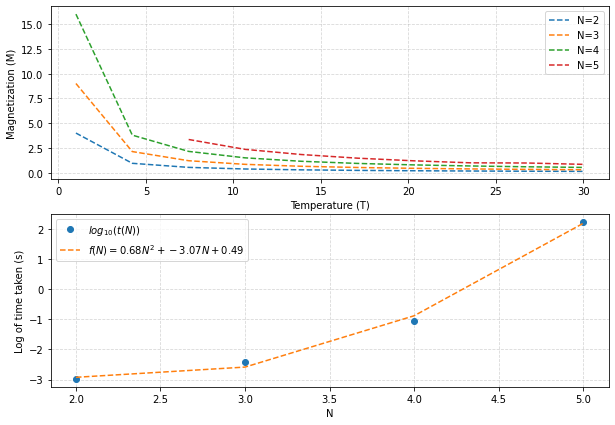

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
for idx, n in enumerate(N):
    axs[0].plot(T, magnetization[idx], label=f"N={n}", ls='--')
log_time_taken = np.log10(time_taken)
fitted_coeffs = np.polyfit(N, log_time_taken, 2)
axs[1].plot(N, log_time_taken, 'o', label=r"$log_{10}(t(N))$")
axs[1].plot(N, np.polyval(fitted_coeffs, N),ls='--',
            label=rf"$f(N)={round(fitted_coeffs[0],2)}N^2+{round(fitted_coeffs[1], 2)}N+{round(fitted_coeffs[2], 2)}$")

axs[0].set_xlabel("Temperature (T)")
axs[0].set_ylabel("Magnetization (M)")
axs[1].set_xlabel("N")
axs[1].set_ylabel("Log of time taken (s)")
for ax in axs:
    ax.legend()
    ax.grid(ls='--', alpha=0.5)


The time taken to run this code is exponential (which is reflected by the fact that the time taken is not a straight line in the loglog plot). In fact, we can see that the fitted function reveals that $t(10) = 10^{68-30.7+0.49}\approx 10^{37}$ seconds (compared to a year, which is $10^7$ seconds).  For $N_0 \approx 10^{23}$, the resulting time would be $t(N_0) \approx 10^{10^{46}}$, and which is a number so large it is not even possible for us to fathom. 

#### 2.2 Diagnosing Phase Transitions in a Generalized Ising Model Using Transfer Matrices
In this problem we will numerically solve a generic 1D spin model, naively hoping to see a transition, using the formalism of transfer matrices as described in lecture. Consider the degree of freedom $\sigma_i\in\{-1,1\}$ living on each site subject to a Hamiltonian:
$$H=-\sum_{<ij>}J(i)\sigma_i\sigma_j+\sum_{i}h(i)\sigma_i$$
Where $J(i)=J\left(1+\frac{(-1)^i}{2}\right)$ and $h(i)=\cos^2(i)$<br>
(a) Create an N site python array which will serve as the lattice and a connectivity graph which declares the connections between neighbouring sites (use periodic boundary conditions).<br>
(b) Define the transfer matrix for each bond.<br>
(c) Calculate the partition function $Z$ as the trace of the product of the transfer matrices for each bond<br>
(d) Plot the magnetisation of an arbitrary single spin as a function of temperature for large system sizes.<br>
(e) What information does this give you about phases of lattice models in 1D? Is there a way to get around this? Hint: Play around with the functions $J(i),h(i),$ does any combination produce a transition?<br>
(f) In fact, the Mermin-Wagner-Hohenberg Theorem claims that there cannot be any ordered phase in 1 or 2 dimensions, but we know of ordered phases like 2D crystals. Can you explain what is going on here? (You may treat this part as a googling adventure to synthesize a good explanation)

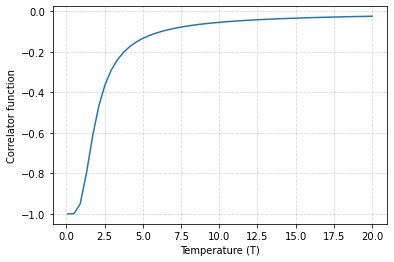

In [60]:
"""In the following, we will use multidimensional arrays which 
usually have the temperature along the first axis. This might become a bit confusing
and makes it more convenient to use einsum to do the matrix multiplications and traces."""

def multiply_chain(chain: np.ndarray) -> np.ndarray:
    """calculates the product of a chain of matrices. Here, we have a chain of 2x2 matrices
    for each temperature. In the following procedure, we will usually just neglect the 
    0th axis as this corresponds to the temperature axis.

    Args:
        chain (np.ndarray): Chain of matrices. In our example, 
        it has dimensions (len(T), N, 2, 2)

    Returns:
        np.ndarray: Product of the chain. In our example, it has dimensions (len(T), 2, 2)
    """
    prod = np.array([np.eye(2)]*chain.shape[0])
    for i in range(chain.shape[1]):
        elem = chain[:, i, :, :]
        prod = np.einsum('mij,mjk->mik', prod, elem)
    return prod

def partition_and_correlator(N: int, J: np.ndarray, h: np.ndarray, idx: int, T: np.ndarray) -> tuple:
    """Function to calculate partition function and correlator function for a given idx

    Args:
        N (int): Number of lattice points
        J (np.ndarray): Coupling constant for quadratic term. Can vary along lattice (shape = (N,)
        h (np.ndarray): Coupling constant for linear term. Can vary along lattice (shape = (N,)
        idx (int): Index of lattice point for which we want to calculate the correlator
        T (np.ndarray): Temperature array (shape = (len(T),)

    Returns:
        tuple: Returns a tuple of the partition function and the correlator
        function (both arrays of shape (len(T),)
    """
    h_shifted = np.roll(h, 1)
    chain_transfer = np.zeros((len(T),N, 2, 2))
    chain_transfer[:,:, 0, 0] = np.exp(- np.multiply.outer(1/T,-J+h/2+h_shifted/2))
    chain_transfer[:,:, 1, 1] = np.exp(- np.multiply.outer(1/T, -J-h/2-h_shifted/2))
    chain_transfer[:,:, 0, 1] = np.exp(- np.multiply.outer(1/T, +J))
    chain_transfer[:,:, 1, 0] = np.exp(- np.multiply.outer(1/T,+J))
    prod_transfer = multiply_chain(chain_transfer)
    Z = np.einsum('ijj->i', prod_transfer)
    sigma_z = np.array([[[1, 0], [0, -1]]]*len(T))
    correlator_chain = np.insert(chain_transfer, idx, sigma_z, axis=1)
    correlator_func = np.einsum('ijj->i', multiply_chain(correlator_chain))/Z
    return Z, correlator_func

N = 30
J = 1
Js = np.zeros(N)
Js[0::2] = J*3/2
Js[1::2] = J/2
Js = Js
hs = 1*np.cos(np.arange(N))**2
temperature = np.linspace(.1, 20, 50)
Z, correlator_func = partition_and_correlator(N, Js, hs, 2, temperature)
plt.plot(temperature, correlator_func)
plt.xlabel("Temperature (T)")
plt.ylabel("Correlator function")
plt.grid(ls='--', alpha=0.5)
plt.show()

Notice that it is expected that the values for the correlation function are negative, since the term in the hamiltonian is $+h$ rather than $-h$.

__Answer__:
Notice that, for the MWH theorem to hold, the system but have continuous symmetries. However, tha Ising model with site dependent interactions does not have the required continuous symmetries, and thus there is no reason for the MWH theorem to hold.

## 3. Analytical Exercises

#### 3.1 Symmetry Breaking
(a) Consider again the Model from a previous question (1.2) where we have a 2D lattice with the degree of freedom $\vec{x}_i\in {S^1}$ a 2D unit vector living on each site. The energy function (Hamiltonian) given by
$$H=-J\sum_{<ij>}\vec{x}_i\cdot\vec{x}_j$$
You may have observed that one of the symmetries of this model is a reflection symmetry, flipping all the vectors about any axis, what kind of term can you add to the Hamiltonian which would break this symmetry? That is, assign a preferred orientation to the spins? <br><br>
(b) It would be amiss to leave a discussion of symmetry breaking without discussing the sombrero potential. The following contains ideas with applications in far ranging subfields of physics, from the Higgs mechanism to superconductors to lattice gauge theories.<br>
Consider the family of functions $f(u):R^2\to R$ given by $f(u,t)=u|\vec{x}|^2+|\vec{x}|^4$.<br>
$\;\;\;$(i) What are the symmetries $(g:R^2\to R^2$) which leave $f$ invariant?<br>
$\;\;\;$(ii) Find the set of solutions $\{\vec{x}\in R^2:f(\vec{x})=0\}$ for arbitrary $u$.<br>
$\;\;\;$(iii) Consider the symmetries found in $(i)$, are there two regimes of $u$ where they *act* differently on the set of solutions?

__Answer__:

(a) We could add a term that is linear in $\vec{x}_i$ to break the $\mathbf{Z}_2$ symmetry. In particular, we could add $\delta H = -\displaystyle{\sum_{i} \vec{B} \cdot \vec{x}_i}$, which would minimize the energy if $\vec{B}\cdot \vec{x}_i = \|\vec{B}\| \|\vec{x}_i\| $, but this term would become $-\|\vec{B}\| \|\vec{x}_i\|$ under $\vec{x}_i \to -\vec{x}_i $ and thus the system has a preffered orientation.

(b)

- i) $f(u)(\vec{x})$ is symmetric under $\vec{x}\mapsto g(\vec{x})=R\vec{x}, \,\, R\in O(2)$
- ii) The set of solutions is given by $\Omega = \{\vec{0}\} \cup \{\vec{x} \in \mathbf{R}^2 \,:\, |\vec{x}| = \sqrt{-u}\}$, and $\Omega \neq \{\vec{0}\} \iff u < 0$ 
- iii) We can see that, for $u < 0$, under any symmetry $g$, $g(\vec{x})=R \vec{x}\neq \vec{x}$ for $R \neq \mathbf{1}$, and thus the symmetry can take us from one of the vectors that minimizes $f_u$ to a different one. On the other hand, for $u \geq 0$, we only have the solution $\vec{x} = \vec{0}$, which is invariant under any symmetry $g$ since $g(\vec{0})= R\vec{0} = \vec{0}$.

#### 3.2 Transfer Matrices and Correlation Functions
In lecture, and in one of the previous problems, we saw how to write the partition function of the 1D Ising model as $\text{Tr}[t^n]$ where $t$, the transfer matrix is given by:
$$t=\begin{pmatrix}a&b\\c&d\end{pmatrix}$$
In this exercise we will compute the 1 and 2 point correlators $<\sigma_i>,<\sigma_i\sigma_j>$ using this formalism.<br>
(a) Find a,b,c,d from the energetics of each bond.<br>
(b) Compute $<\sigma_i>$ by writing it as $<\sigma_j>=\frac{1}{Z}\sum_i\;e^{-\beta H_i}\sigma_j$ ($i$ is a sum over states, $H_i$ is the energy of the $i^{th}$ state and $j$ is an index on the lattice). You will have to encode the action of $\sigma_i$ as a matrix.<br>
(c) Compute $<\sigma_i\sigma_j>$ via a similar method.

$\newcommand{\inner}[2]{ \bra{#1}\hspace{-.45em}\ket{#2} }$

__Answer:__

(a)<br>
Given that we have $H = -J \sum_{i, j}\sigma_i \sigma_i - h\sum_i \sigma_i$,
the energetics of each bond are given by $$E(\sigma_i, \sigma_{i+1}) = -J\sigma_i \sigma_{i+1} -\frac{h}{2}(\sigma_i+\sigma_{i+1})$$

Now using the definition $t = \begin{pmatrix}e^{-\beta E(1, 1)}&e^{-\beta E(-1, 1)}\\e^{-\beta E(1, -1)}&e^{-\beta E(-1, -1)}\end{pmatrix}$, we obtain

\begin{align*}
a &= e^{-\beta(-J-h)}\\
b &= e^{-\beta J}\\
c &= e^{-\beta J}\\
d &= e^{-\beta(-J+h)}\\

\end{align*}


(b) Assuming periodic boundary conditions: <br> 
We notice that 
\begin{align*}
    \mathcal{Z}\cdot\langle\sigma_i\rangle&= \sum_{\sigma}\sigma_j e^{-\beta(-J\sum_{<j, k>}\sigma_j \sigma_k- h\sum_k \sigma_k)} = \sum_{\sigma_1 =\pm 1}\ldots \sum_{\sigma_N = \pm 1} \sigma_j t_{\sigma_1 \sigma_2}\ldots t_{\sigma_{N-1}\sigma_N} t_{\sigma_N, \sigma_1}\\
    &=\sum_{\sigma_1 =\pm 1}\bra{\sigma_1}t \underbrace{\sum_{\sigma_2 = \pm 1}\ket{\sigma_2}\bra{\sigma_2}}_{=\mathbf{1}}\ldots t \sum_{\sigma_j = \pm 1}\sigma_j \ket{\sigma_j}\bra{\sigma_j} t \ldots \sum_{\sigma_N = \pm 1}\ket{\sigma_N}\bra{\sigma_N} t \ket{\sigma_1}\\
    &= \mathrm{Tr}[t^{j-1}\hat{\sigma}_z t^{N-j+1}]
\end{align*}

where $\hat{\sigma}_z = \sum_{s=\pm 1}s\ket{s}\bra{s}$ motivated by the fact that, letting $\ket{-1} \equiv \begin{pmatrix}0\\1\end{pmatrix}$, and $\ket{1} \equiv \begin{pmatrix}1\\0\end{pmatrix}$, then $\sum_{s=\pm 1}s\ket{s}\bra{s} = \begin{pmatrix}1&0\\0&-1\end{pmatrix}$, which is the pauli sigma matrix $\hat{\sigma}_z$. 

If we want to find the value explicitely, we can proceed by using the eigenvectors of $t$: $\ket{\psi_{\pm}}$ such that $t\ket{\psi_{\pm}}= \lambda_{\pm }\ket{\psi_{\pm}}$. 

- First, we begin by finding the eigenvalues of $t$:
    $\begin{pmatrix} \lambda - e^{\beta(J+h)} & -e^{-\beta J}\\ -e^{-\beta J}& \lambda - e^{\beta(J-h)}\end{pmatrix} $

    \begin{align*}
        \det(\lambda \mathbf{1} - t) &= \lambda^2 - \lambda e^{\beta J}(e^{-\beta h}+e^{\beta h}) + e^{2\beta J} - e^{-2\beta J} = \lambda^2 - 2\lambda e^{\beta J}\cosh(\beta h)+2\sinh(2\beta J)\\
        \implies \lambda_\pm &= e^{\beta J}\cosh(\beta h) \pm \sqrt{e^{2\beta J}\cosh^2(\beta h)-2\sinh(2\beta J)}\\
        & = e^{\beta J}\cosh(\beta h)\left(1 \pm \sqrt{1 -\frac{2\sinh(2\beta J)}{e^{2\beta J}\cosh^2(\beta h)}}\right)
    \end{align*}

- Then we proceed to find the (unnormalized) eigenvectors:

    \begin{align*}
    x &\left[e^{\beta J}\cosh(\beta h) \pm \sqrt{e^{2\beta J}\cosh^2(\beta h)-2\sinh(2\beta J)}-e^{\beta J }e^{\beta h}\right] -e^{-\beta J}y = 0\\
    \Rightarrow & x e^{\beta J}\left[\frac{1}{2}(e^{\beta h}+e^{-\beta h}) \pm \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}-e^{\beta h}\right] = e^{-\beta J}y\\
    \Rightarrow &\ket{\psi_\pm} =
        \begin{pmatrix} 
            e^{2\beta J}\left[-\sinh(\beta h) \pm \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right]\\1
        \end{pmatrix}
    \end{align*}

- We find that 
\begin{align*}
    \inner{\psi_-}{\psi_+} &= e^{4\beta J} [\sinh^2(\beta h)-\cosh^2(\beta h)+ 2e^{-2\beta J}\sinh(2\beta J)]+1 \\
    & = e^{2 \beta J}[-e^{2 \beta J} + e^{2\beta J}-e^{-2\beta J}]+1 = 0
\end{align*}

And thus $\ket{\psi_\pm}$ are orthogonal.

Now we define $\mathcal{N}_\pm^2\coloneqq \inner{\psi_\pm}{\psi_\pm}=\displaystyle{\sum_{s=\pm 1}\inner{\psi_{\pm}}{s} \inner{s}{\psi_{\pm} }} =\displaystyle{\sum_{s=\pm 1}|\inner{\psi_{\pm}}{s}|^2}$

and proceed to redifine the eigenvectors by $\ket{\psi'_\pm}= \frac{1}{\mathcal{N}_\pm}\ket{\psi_\pm}$ such that $\ket{\psi'_\pm}$ are orthonormal and thus we can use the resolution of identity with them .

Now we can proceed to calculate $\langle \sigma_i \rangle$:
\begin{align*}
    \mathrm{Tr}[t^{j-1}\hat{\sigma}_z t^{N-j+1}] &= \sum_{\xi = \psi'_{\pm}} \bra{\xi}t^{j-1}\hat{\sigma}_z t^{N-j+1} \ket{\xi}\\
    & = \lambda_{+}^N \bra{\psi'_+}\hat{\sigma}_z\ket{\psi'_+}+ \lambda_{-}^N \bra{\psi'_-}\hat{\sigma}_z\ket{\psi'_-}
\end{align*}

Expanding $\bra{\psi'_\pm}\hat{\sigma}_z\ket{\psi'_\pm}$, we have:
\begin{align*}
    \bra{\psi'_\pm}\hat{\sigma}_z\ket{\psi'_\pm} &= \sum_{s_1 = \pm 1}\sum_{s_2 = \pm 1} \inner{\psi'_\pm}{s_1}\bra{s_1}\hat{\sigma}_z\ket{s_2}\inner{s_2}{\psi'_\pm}\\
    &=\sum_{s_1 = \pm 1}\sum_{s_2 = \pm 1} s_2 \delta_{s_1, s_2}\inner{\psi'_\pm}{s_1}\inner{s_2}{\psi'_\pm}=\sum_{s_1 = \pm 1}s_1 |\inner{\psi'_\pm}{s_1}|^2\\
    &= \frac{|\inner{\psi_\pm}{1}|^2-|\inner{\psi_\pm}{-1}|^2}{|\inner{\psi_\pm}{1}|^2+|\inner{\psi_\pm}{-1}|^2}\\
    & = \frac{e^{4\beta J}\left[-\sinh(\beta h) \pm \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right]^2 -1}{e^{4\beta J}\left[-\sinh(\beta h) \pm \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right]^2 +1}\\
    &=\frac{2e^{2\beta J}\sinh^2(\beta h)\left[1\mp \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right] + e^{2\beta J}-2\sinh(2\beta J) -e^{-2\beta J}}{2e^{2\beta J}\sinh^2(\beta h)\left[1\mp \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right] + e^{2\beta J}-2\sinh(2\beta J) +e^{-2\beta J}}\\
    &=\frac{e^{2\beta J}\sinh^2(\beta h)\left[1\mp \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right]}{e^{2\beta J}\sinh^2(\beta h)\left[1\mp \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right] + \cosh(2\beta h)-\sinh(2\beta h)}\\
    &=\frac{1}{1+\frac{e^{-2\beta J}(\cosh(2\beta h)-\sinh(2\beta h))}{\sinh^2(\beta h)\left[1\mp \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right]}} = \frac{1}{1+\frac{e^{-4\beta J}}{\sinh^2(\beta h)\left[1\mp \sqrt{\cosh^2(\beta h)-2e^{-2\beta J}\sinh(2\beta J)}\right]}}
\end{align*}

Where in the fifth equality, at risk of being a bit fast (and hopefully having taken sufficient care) we have expanded the square, used that $\cosh^2(x) = 1+\sinh^2(x)$, divided both numerator and denominator by $e^{2\beta J}$, multiplied out the remaining $e^{2\beta J}$, and then simply grouped up the terms.

Then, we can finally obtain an expression for $\langle \sigma_i \rangle$:

$$\langle \sigma_i \rangle = \frac{\lambda_{+}^N \bra{\psi'_+}\hat{\sigma}_z\ket{\psi'_+}+ \lambda_{-}^N \bra{\psi'_-}\hat{\sigma}_z\ket{\psi'_-}}{\lambda_+^N + \lambda_- ^N} $$

We can also notice that, since $\lambda_+>\lambda_-$, at the limit $N\to \infty$ we have $\lambda_+^N + \lambda_-^N = \lambda_+^N (1 + \frac{\lambda_-}{\lambda_+}^N) \approx \lambda_+^N$.

At this limit, we have:
\begin{align*}
    \langle \sigma_i \rangle &= \frac{\lambda_{+}^N \bra{\psi'_+}\hat{\sigma}_z\ket{\psi'_+}+ \lambda_{-}^N \bra{\psi'_-}\hat{\sigma}_z\ket{\psi'_-}}{\lambda_+^N + \lambda_- ^N} = \frac{\lambda_+}{\lambda_+}^N \frac{\bra{\psi'_+}\hat{\sigma}_z\ket{\psi'_+}+\frac{\lambda_-}{\lambda_+}^N\bra{\psi'_-}\hat{\sigma}_z\ket{\psi'_-}}{1+\frac{\lambda_-}{\lambda_+}^N} \\
    &\approx \bra{\psi'_+}\hat{\sigma}_z\ket{\psi'_+}
\end{align*}

That was a lot of algebra; I hope I didn't make some silly mistake :)

(c) Without loss of generality, we assume that $i \leq j$.
Then we have:
$$\mathcal{Z}\cdot \langle \sigma _i \sigma_j \rangle = \mathrm{Tr}[t^{i-1}\hat{\sigma}_z t^{j-i}\hat{\sigma}_z t^{N-j+1}]$$

Then, by inserting an identity operator, we have:
\begin{align*}
    \mathcal{Z} \cdot \langle \sigma _i \sigma_j \rangle &= \sum_{\xi=\psi_\pm}\sum_{\eta = \psi_\pm} \lambda_{\xi}^{N-{j-i}}\lambda_{\eta}^{j-i}\bra{\xi}\hat{\sigma}_z \ket{\eta}\bra{\eta}\hat{\sigma}_z\ket{\xi}\\
    &=\sum_{\xi=\psi_\pm}\sum_{\eta = \psi_\pm} \lambda_{\xi}^{N-{j-i}}\lambda_{\eta}^{j-i}|\bra{\xi}\hat{\sigma}_z \ket{\eta}|^2\\
    &= \lambda_+^N |\bra{\psi_+}\hat{\sigma}_z \ket{\psi_+}|^2 + (\lambda_+^{N-j+i}\lambda _-^{j-i}+ \lambda_-^{N-j+i}\lambda _+^{j-i})|\bra{\psi_+}\hat{\sigma}_z \ket{\psi_-}|^2+\lambda_-^N |\bra{\psi_-}\hat{\sigma}_z \ket{\psi_-}|^2
\end{align*}

which can be expanded as before. Notice that $\langle \sigma_i\rangle$ is independent of $i$ and $\langle \sigma_i \sigma_j \rangle$ only depends on the difference $i-j$, which behaves according to the translational invariance of our system with respect to the lattice points.



#### 3.3 $\Phi$ Field Theory $\to$ Ising
In this problem we will invert the process of going from short distance physics to long distance physics by considering the $\Phi^4$ theory, introduced at the end of lecture, on a lattice and observe that it generically reproduces the Ising model.<br>
Recall that the Hamiltonian for the free $\Phi$ field model looks like:
$$H=\int d^2x \left[\frac{1}{2}(\partial_x\Phi)^2+\frac{1}{2}(\partial_y\Phi)^2+\frac{m^2}{2}|\Phi|^2+\frac{\lambda}{4!}\Phi^4\right]$$
Put this theory on a square lattice by letting $\phi_{i,j}=\phi(i,j)$, that is the field evaluated on the grid point, and $\int d^2x\to\sum_i\sum_j$ and via necessary approximations along the way bring the Hamiltonian into the form of an Ising model.

__Answer__:

First, we notice that we can write $\displaystyle{\partial_{t}\Phi (x, t) = \lim_{\Delta t\to 0}\frac{\Phi(x, t+\Delta t)- \Phi(x, t)}{\Delta t}}$. Thus, assuming a lattice constant $a$, we need to also make the approximation
$$\partial_t \Phi(x_i, t_j) \to \frac{\phi_{i, j+1}-\phi_{i, j}}{a}, \;\partial_x \Phi(x_i, t_j) \to \frac{\phi_{i+1, j}-\phi_{i, j}}{a}$$

We then have 
\begin{align*}
    H=&\int d^2x \left[\frac{1}{2}(\partial_x\Phi)^2+\frac{1}{2}(\partial_y\Phi)^2+\frac{m^2}{2}|\Phi|^2+\frac{\lambda}{4!}\Phi^4\right] \\
    &\to \sum_{i, j} \left[\frac{1}{2a^2}(\phi_{i, j+1}^2-2\phi_{i, j+1}\phi_{i, j} + \phi_{i, j}^2) + \frac{1}{2a^2}(\phi_{i+1, j}^2-2\phi_{i+1, j}\phi_{i, j} + \phi_{i, j}^2)+\frac{1}{2}m^2\phi_{i, j}^2 +\frac{\lambda}{4!}\phi_{i, j}^4 \right]\\
    &= -\frac{1}{a^2}\underbrace{ \sum_{i, j}(\phi_{i+1, j}\phi_{i, j}+\phi_{i, j+1}\phi_{i, j})}_{\displaystyle{\sum_{<(i_1, j_1), (i_2, j_2)>}}\phi_{i_1, j_1}\phi_{i_2, j_2} }+ \sum_{i}( \frac{2}{a^2}+\frac{m^2}{2}) \phi_{i, j}^2 +\frac{\lambda}{4!}\phi^4_{i, j}\\
    &\xrightarrow{\phi_{ij} = \sqrt{J}a\sigma_{ij}} -J\sum_{\langle(i, j), (m, n)\rangle} \sigma_{i j}\sigma_{m n} + \sum_{i,j}\left(2J+\frac{m^2a^2 J}{2}\right)\sigma_{ij}^2+\frac{J^2\lambda}{4!}\sigma^4_{ij}\\
    &\xrightarrow{\sigma_{ij}^2=1} -J\sum_{\langle ij, mn \rangle} \sigma_{ij}\sigma_{mn}  + N^2\left(2J+\frac{m^2a^2 J}{2}+\frac{J^2\lambda}{4!} \right)
\end{align*}
Here, we only have a constant difference with the Ising model Hamiltonian, which leads to the same physics (as the physical quantities really are the energy differences or gradients). 

## 4. Consolidation of the Week

Please use the space below to tell us how this week of learning has been for you, what has been especially interesting and what was challenging. Also mention whether the problems and lecture were useful and how you are generally feeling in the course so far and if there are any changes you would like to see.

__Asnwer:__

The problems this week were very interesting for sure! I liked the analytical treatment of the ising model with ising matrices, and also very much the finding of symmetries of a system. I am enjoying the course a lot so far, and I look forward to start slowly getting into the good stuff :)